In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import requests
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

esperance au
nikolskoye ru
arraial do cabo br
jumla np
wattegama lk
nanortalik gl
ushuaia ar
albany au
longyearbyen sj
muravlenko ru
guerrero negro mx
russell nz
jamestown sh
alofi nu
shirokiy ru
nago jp
cape town za
saskylakh ru
cabo san lucas mx
souillac mu
punta arenas cl
kruisfontein za
yellowknife ca
lasa cn
hilo us
taolanaro mg
kapaa us
atar mr
arraial do cabo br
aklavik ca
tete mz
mataura pf
saleaula ws
busselton au
eyl so
barentsburg sj
salalah om
ngukurr au
esperance au
raudeberg no
hermanus za
hermanus za
waipawa nz
kruisfontein za
rikitea pf
miyako jp
danjiangkou cn
vaini to
punta arenas cl
norman wells ca
mataura pf
hilo us
kamenskoye ru
kodiak us
barentsburg sj
punta arenas cl
atambua id
punta arenas cl
mataura pf
aksu cn
victoria sc
neiafu to
kilemary ru
sao felix do xingu br
kosum phisai th
okhotsk ru
dikson ru
chokurdakh ru
bluff nz
arraial do cabo br
lagos ng
burriana es
pevek ru
upernavik gl
dikson ru
kaifeng cn
kostino ru
rikitea pf
mataura pf
lebu cl
castro cl
tukto

esperance au
upington za
keti bandar pk
ushuaia ar
atuona pf
east london za
drjanovo bg
hithadhoo mv
perth au
baruun-urt mn
saskylakh ru
juan lacaze uy
tual id
temirtau kz
tuktoyaktuk ca
port alfred za
poum nc
vila franca do campo pt
carnarvon au
kavaratti in
constitucion mx
soto la marina mx
gazli uz
cherskiy ru
avarua ck
qaanaaq gl
mataura pf
marcona pe
souillac mu
albany au
mataura pf
nelson bay au
santa cruz de la palma es
atuona pf
abu samrah qa
port moresby pg
tuktoyaktuk ca
hithadhoo mv
bredasdorp za
busselton au
cangzhou cn
rikitea pf
anapskaya ru
awjilah ly
vaini to
saint-philippe re
attawapiskat ca
taolanaro mg
kaitangata nz
moncton ca
new norfolk au
lompoc us
provideniya ru
punta arenas cl
luderitz na
san pedro bz
necochea ar
itoman jp
upernavik gl
butaritari ki
hami cn
troitsko-pechorsk ru
port hedland au
palabuhanratu id
ribeira grande pt
vaini to
naron es
zambrow pl
tapaua br
port elizabeth za
atuona pf
semey kz
ushuaia ar
illoqqortoormiut gl
playas ec
lagoa pt
tuktoyaktu

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
#Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | esperance
Processing Record 2 of Set 13 | nikolskoye
Processing Record 3 of Set 13 | arraial do cabo
Processing Record 4 of Set 13 | jumla
Processing Record 5 of Set 13 | wattegama
Processing Record 6 of Set 13 | nanortalik
Processing Record 7 of Set 13 | ushuaia
Processing Record 8 of Set 13 | albany
Processing Record 9 of Set 13 | longyearbyen
Processing Record 10 of Set 13 | muravlenko
Processing Record 11 of Set 13 | guerrero negro
Processing Record 12 of Set 13 | russell
Processing Record 13 of Set 13 | jamestown
Processing Record 14 of Set 13 | alofi
Processing Record 15 of Set 13 | shirokiy
Processing Record 16 of Set 13 | nago
Processing Record 17 of Set 13 | cape town
Processing Record 18 of Set 13 | saskylakh
Processing Record 19 of Set 13 | cabo san lucas
Processing Record 20 of Set 13 | souillac
Processing Record 21 of Set 13 | punta arenas
Processing Record 22 of Set 13 | kruisfonte

Processing Record 38 of Set 16 | mastung
Processing Record 39 of Set 16 | namatanai
Processing Record 40 of Set 16 | amderma
City not found. Skipping...
Processing Record 41 of Set 16 | beian
Processing Record 42 of Set 16 | husavik
Processing Record 43 of Set 16 | tual
Processing Record 44 of Set 16 | bambous virieux
Processing Record 45 of Set 16 | saint-pierre
Processing Record 46 of Set 16 | kuah
Processing Record 47 of Set 16 | wenzhou
Processing Record 48 of Set 16 | andenes
Processing Record 49 of Set 16 | clyde river
Processing Record 50 of Set 16 | karkaralinsk
City not found. Skipping...
Processing Record 1 of Set 17 | hamilton
Processing Record 2 of Set 17 | namibe
Processing Record 3 of Set 17 | akureyri
Processing Record 4 of Set 17 | at-bashi
Processing Record 5 of Set 17 | gazli
Processing Record 6 of Set 17 | vila velha
Processing Record 7 of Set 17 | cherskiy
Processing Record 8 of Set 17 | mayumba
Processing Record 9 of Set 17 | camaqua
Processing Record 10 of Set 17 

Processing Record 20 of Set 20 | castlegar
Processing Record 21 of Set 20 | ingham
Processing Record 22 of Set 20 | attawapiskat
City not found. Skipping...
Processing Record 23 of Set 20 | pandaria
Processing Record 24 of Set 20 | maceio
Processing Record 25 of Set 20 | sao domingos
Processing Record 26 of Set 20 | kyzyl-suu
Processing Record 27 of Set 20 | hammerfest
Processing Record 28 of Set 20 | vila
Processing Record 29 of Set 20 | comodoro rivadavia
Processing Record 30 of Set 20 | marcona
City not found. Skipping...
Processing Record 31 of Set 20 | tilichiki
Processing Record 32 of Set 20 | ust-nera
Processing Record 33 of Set 20 | kalmunai
Processing Record 34 of Set 20 | oschersleben
Processing Record 35 of Set 20 | ballina
Processing Record 36 of Set 20 | mahebourg
Processing Record 37 of Set 20 | bama
Processing Record 38 of Set 20 | satitoa
City not found. Skipping...
Processing Record 39 of Set 20 | fatehpur
Processing Record 40 of Set 20 | sentyabrskiy
City not found. S

Processing Record 6 of Set 24 | geraldton
Processing Record 7 of Set 24 | keuruu
Processing Record 8 of Set 24 | richards bay
Processing Record 9 of Set 24 | denau
City not found. Skipping...
Processing Record 10 of Set 24 | jaipur hat
City not found. Skipping...
Processing Record 11 of Set 24 | vilyuysk
Processing Record 12 of Set 24 | zabol
Processing Record 13 of Set 24 | bolungarvik
City not found. Skipping...
Processing Record 14 of Set 24 | akranes
Processing Record 15 of Set 24 | katangli
Processing Record 16 of Set 24 | prince albert
Processing Record 17 of Set 24 | bugiri
Processing Record 18 of Set 24 | kindia
Processing Record 19 of Set 24 | yagodnoye
Processing Record 20 of Set 24 | broome
Processing Record 21 of Set 24 | leshukonskoye
Processing Record 22 of Set 24 | gat
Processing Record 23 of Set 24 | vestmannaeyjar
Processing Record 24 of Set 24 | nyurba
Processing Record 25 of Set 24 | dunedin
Processing Record 26 of Set 24 | qingdao
Processing Record 27 of Set 24 | pr

In [10]:
len(city_data)

573

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,49.84,59,100,5.23,AU,2021-10-09 20:43:27
1,Nikolskoye,59.7035,30.7861,53.87,85,99,5.77,RU,2021-10-09 20:43:27
2,Arraial Do Cabo,-22.9661,-42.0278,69.76,68,90,16.11,BR,2021-10-09 20:38:57
3,Jumla,29.2747,82.1838,51.39,82,6,4.36,NP,2021-10-09 20:43:28
4,Wattegama,6.7989,81.4808,77.18,77,100,4.29,LK,2021-10-09 20:43:28
5,Nanortalik,60.1432,-45.2371,36.36,82,6,6.62,GL,2021-10-09 20:43:28
6,Ushuaia,-54.8000,-68.3000,51.46,66,40,6.91,AR,2021-10-09 20:42:49
7,Albany,42.6001,-73.9662,65.62,70,100,3.00,US,2021-10-09 20:42:02
8,Longyearbyen,78.2186,15.6401,17.44,79,20,8.05,SJ,2021-10-09 20:40:15
9,Muravlenko,63.7898,74.5230,28.71,78,100,19.48,RU,2021-10-09 20:43:29


In [12]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Esperance,AU,2021-10-09 20:43:27,-33.8667,121.9000,49.84,59,100,5.23
1,Nikolskoye,RU,2021-10-09 20:43:27,59.7035,30.7861,53.87,85,99,5.77
2,Arraial Do Cabo,BR,2021-10-09 20:38:57,-22.9661,-42.0278,69.76,68,90,16.11
3,Jumla,NP,2021-10-09 20:43:28,29.2747,82.1838,51.39,82,6,4.36
4,Wattegama,LK,2021-10-09 20:43:28,6.7989,81.4808,77.18,77,100,4.29
...,...,...,...,...,...,...,...,...,...
568,Coracora,PE,2021-10-09 20:46:32,-15.0333,-73.7833,59.92,49,90,11.41
569,Smolenka,RU,2021-10-09 20:46:32,52.1352,113.4974,32.07,69,6,8.95
570,Fereydunshahr,IR,2021-10-09 20:46:32,32.9410,50.1210,44.80,55,0,4.07
571,Saint Anthony,US,2021-10-09 20:44:24,45.0205,-93.2180,79.25,65,1,3.00


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1633812393.5677881

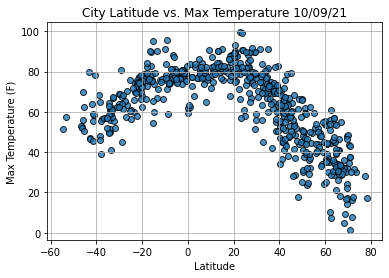

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


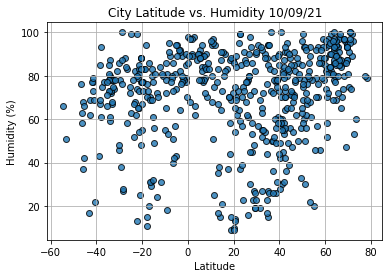

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

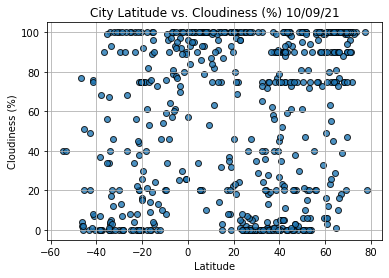

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

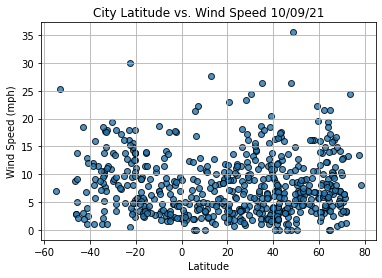

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [21]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [22]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

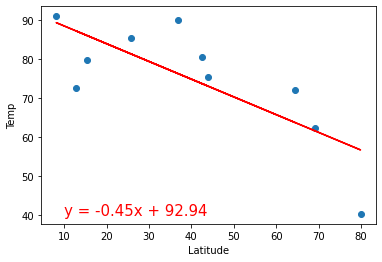

In [28]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

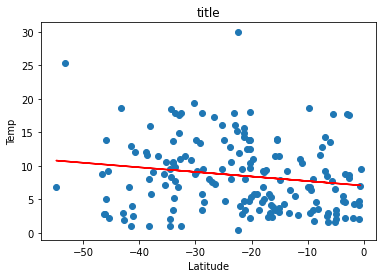

In [41]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title('title')
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()


In [30]:
# Create a function to create perform linear regression on the weather data, and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Nikolskoye,RU,2021-10-09 20:43:27,59.7035,30.7861,53.87,85,99,5.77
3,Jumla,NP,2021-10-09 20:43:28,29.2747,82.1838,51.39,82,6,4.36
4,Wattegama,LK,2021-10-09 20:43:28,6.7989,81.4808,77.18,77,100,4.29
5,Nanortalik,GL,2021-10-09 20:43:28,60.1432,-45.2371,36.36,82,6,6.62
7,Albany,US,2021-10-09 20:42:02,42.6001,-73.9662,65.62,70,100,3.00
...,...,...,...,...,...,...,...,...,...
566,Izmit,TR,2021-10-09 20:46:31,40.7669,29.9169,63.27,100,75,0.00
567,Chapais,CA,2021-10-09 20:45:38,49.7834,-74.8492,65.98,65,61,10.80
569,Smolenka,RU,2021-10-09 20:46:32,52.1352,113.4974,32.07,69,6,8.95
570,Fereydunshahr,IR,2021-10-09 20:46:32,32.9410,50.1210,44.80,55,0,4.07


In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Nikolskoye,RU,2021-10-09 20:43:27,59.7035,30.7861,53.87,85,99,5.77
3,Jumla,NP,2021-10-09 20:43:28,29.2747,82.1838,51.39,82,6,4.36
4,Wattegama,LK,2021-10-09 20:43:28,6.7989,81.4808,77.18,77,100,4.29
5,Nanortalik,GL,2021-10-09 20:43:28,60.1432,-45.2371,36.36,82,6,6.62
7,Albany,US,2021-10-09 20:42:02,42.6001,-73.9662,65.62,70,100,3.00


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

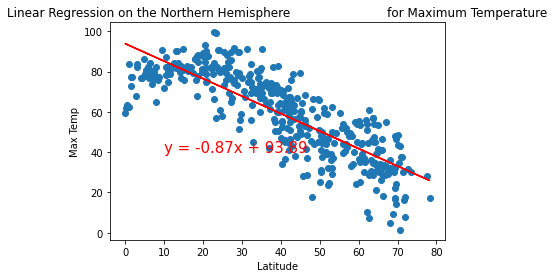

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

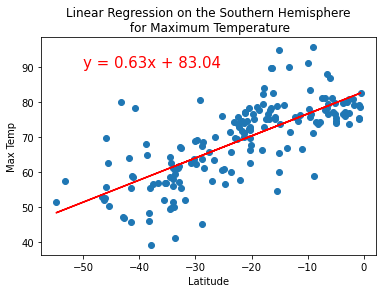

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))

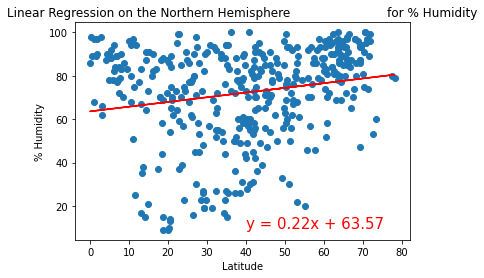

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

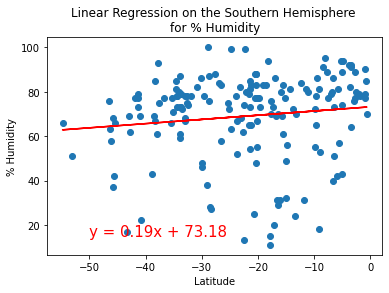

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
    'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

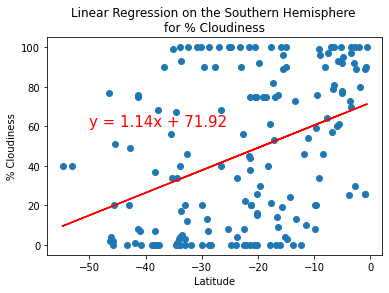

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
    'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

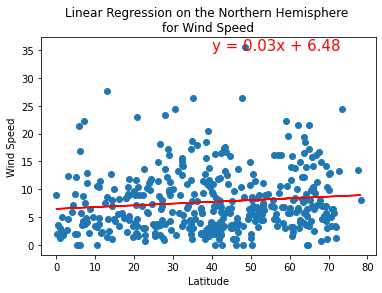

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
    'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

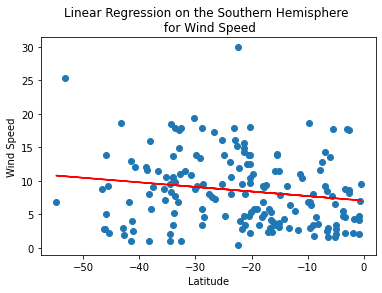

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))